One of the business keys is to be able to classify customers, based on their value. So that different marketing strategies can be carried out, can focus on high-value customers, and increase the profit of a company. The purpose of this case is to identify customer value. 

# Initialization


In [9]:
#from google.colab import files 
#uploaded  = files.upload()
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# load dataset
df = pd.read_csv('/content/drive/MyDrive/Project/Market-Segmentation-for-Airlines/flight.csv')
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


Feature name	    |  Description
------------------|------------------
MEMBER_NO 	      | Member ID<br>
FFP_DATE	        | Frequent Flyer Program Join Date
FIRST_FLIGHT_DATE	| First Flight Date
GENDER            |	Gender
FFP_TIER	        | Frequent Flyer Program Tier
WORK_CITY	        | Work City
WORK_PROVINCE     |	Work Proviince
WORK_COUNTRY	    | Work Country
AGE	Customer      | Age
LOAD_TIME	        | Date data was taken
FLIGHT_COUNT	    | Number of customer flights
BP_SUM	          | Boarding plan
SUM_YR_1	        | Fare Revenue
SUM_YR_2	        | Votes Prices
SEG_KM_SUM	      | Total distance (km) flights that have been done
LAST_FLIGHT_DATE	| Last Flight Date
LAST_TO_END	      | last flight time to last flight order interval
AVG_INTERVAL	    | Average time distance
MAX_INTERVAL	    | Maximum time distance
EXCHANGE_COUNT	  | Number of redemptions
avg_discount	    | The average discount that customers get
Points_Sum	      | The number of points earned by the customer
Point_NotFlight	  | Points not used by members

#Data Preprocessing

It can be seen from the sample above, between the columns and their values there is nothing strange and in accordance with the data definition

## A. Differentiate Categorical and Numerical Column

In [11]:
num = df.loc[:, (df.dtypes == int) | (df.dtypes == float)].columns.tolist()
print('Numeric columns :')
display(num)
cat = df.loc[:, (df.dtypes != int) & (df.dtypes != float)].columns.tolist()
print('\nCategorical columns :')
display(cat)

Numeric columns :


['MEMBER_NO',
 'FFP_TIER',
 'AGE',
 'FLIGHT_COUNT',
 'BP_SUM',
 'SUM_YR_1',
 'SUM_YR_2',
 'SEG_KM_SUM',
 'LAST_TO_END',
 'AVG_INTERVAL',
 'MAX_INTERVAL',
 'EXCHANGE_COUNT',
 'avg_discount',
 'Points_Sum',
 'Point_NotFlight']


Categorical columns :


['FFP_DATE',
 'FIRST_FLIGHT_DATE',
 'GENDER',
 'WORK_CITY',
 'WORK_PROVINCE',
 'WORK_COUNTRY',
 'LOAD_TIME',
 'LAST_FLIGHT_DATE']

* Regarding statistical summary on numeric column:

    * There are 15 numeric columns.
    * The MEMBER_NO, FFP_TIER and avg_discount columns appear to have a normal distribution with mean values ​​close to and not much different from the median.
    * Most columns have a positively skewed distribution (Mean > Median, allowing outliers).
    * It can be seen that there is a ticket price with a value of 0. It can be seen in the SUM_YR_1 and SUM_YR_2 columns. Needs to be analyzed further.
    * It can be seen that there is an average discount of 0. It can be seen in the avg_discount column. Needs to be analyzed further.
    * Seen there are customers who are 110 years old. This can be seen in the AGE column. It looks like it can be deleted because it's abnormal.

* Regarding the statistical summary of the categorical column:

    * There are 8 categorical columns.
    * The majority of customers are Male with a frequency of 48134.
    * Almost all columns have high unique values, except the GENDER column.
    * Judging from the LOAD_TIME column, this dataset was taken on 31-3-2014, it can be used as a cut off date.

##B. Data types and data completeness

In [12]:
print('Some samples :')
display(df.sample(5))
print('\nInformation :')
display(df.info())
print('\n\nNumeric column desc :')
display(df[num].describe().T)
print('\n\nCategorical column desc :')
display(df[cat].describe())

Some samples :


,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
48649,1986,3/27/2013,5/11/2013,Male,4,shanghai,shanghai,CN,32.0,3/31/2014,...,2946.0,5300,8/29/2013,216,36.666667,41,0,0.561155,1442,0
16480,36552,1/10/2006,4/3/2007,Male,5,zhengzhou,henan,CN,45.0,3/31/2014,...,0.0,14056,3/25/2013,373,25.428571,170,0,1.046742,15286,1
26418,43909,2/15/2011,1/26/2012,Female,4,beijing,---,CN,48.0,3/31/2014,...,3187.0,11150,8/31/2013,214,60.250000,164,0,0.798700,8494,0
1252,3670,11/9/2008,11/9/2008,Male,4,xining,qinghai,CN,40.0,3/31/2014,...,16274.0,47238,2/4/2014,57,29.000000,221,0,1.363049,54433,0
10148,3742,9/30/2008,10/12/2008,Male,4,guangzhou,guangdong,CN,36.0,3/31/2014,...,14461.0,29854,1/31/2014,61,32.923077,163,0,0.727872,17210,0



Information :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO

None



Numeric column desc :


,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0




Categorical column desc :


,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,LOAD_TIME,LAST_FLIGHT_DATE
count,62988,62988,62985,60719,59740,62962,62988,62988
unique,3068,3406,2,3234,1165,118,1,731
top,1/13/2011,2/16/2013,Male,guangzhou,guangdong,CN,3/31/2014,3/31/2014
freq,184,96,48134,9386,17509,57748,62988,959


* The dataset has 62,988 rows and 23 columns.

* In the FFP_DATE, FIRST_FLIGHT_DATE, LOAD_TIME, LAST_FLIGHT_DATE columns it is recommended to change the type to datetime.

* For AGE columns, it is recommended to change the type to int64.

* There are many missing values ​​in the column:
GENDER, WORK_CITY, WORK_PROVINCE, WORK_COUNTRY, AGE, SUM_YR_1, SUM_YR_2.



## C. Handle Missing Values

In [13]:
df_clean = df.copy()
data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value['percentage'] = round((data_missing_value['missing_value']/len(df_clean))*100,3)
data_missing_value = data_missing_value.sort_values('percentage', ascending=False).reset_index(drop=True)
data_missing_value = data_missing_value[data_missing_value['percentage']>0]
data_missing_value

,feature,missing_value,percentage
0,WORK_PROVINCE,3248,5.157
1,WORK_CITY,2269,3.602
2,SUM_YR_1,551,0.875
3,AGE,420,0.667
4,SUM_YR_2,138,0.219
5,WORK_COUNTRY,26,0.041
6,GENDER,3,0.005


* Missing values were found in 7 columns, with the highest percentage in the `WORK_PROVINCE` column of 5.16%.

* For columns `SUM_YR_1`, `AGE`, `SUM_YR_2`, `WORK_COUNTRY`, `GENDER` due to missing values below 1%, will be deleted. 

* For the `WORK_CITY` and `WORK_PROVINCE` columns, the mode value will be entered.

In [14]:
missing_col = ['SUM_YR_1', 'AGE', 'SUM_YR_2', 'WORK_COUNTRY', 'GENDER']
for col in missing_col:
  df_clean.dropna(subset=[col], inplace=True)

df_clean['WORK_CITY'].fillna(df_clean['WORK_CITY'].mode()[0], inplace=True)
df_clean['WORK_PROVINCE'].fillna(df_clean['WORK_PROVINCE'].mode()[0], inplace=True)

data_missing_value = df_clean.isnull().sum().reset_index()
data_missing_value.columns = ['feature','missing_value']
data_missing_value

,feature,missing_value
0,MEMBER_NO,0
1,FFP_DATE,0
2,FIRST_FLIGHT_DATE,0
3,GENDER,0
4,FFP_TIER,0
5,WORK_CITY,0
6,WORK_PROVINCE,0
7,WORK_COUNTRY,0
8,AGE,0
9,LOAD_TIME,0


## D.Feature Engineering

In [15]:
display(df_clean['LAST_FLIGHT_DATE'].unique())
display(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2')])
print('Incorrect `LAST_FLIGHT_DATE` data percentage: ', end='\n\n')
print(str(round(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')]['LAST_FLIGHT_DATE'].count()/len(df_clean), 3)), '%')

array(['3/31/2014', '3/25/2014', '3/21/2014', '12/26/2013', '3/27/2014',
       '1/13/2014', '3/29/2014', '3/26/2014', '3/17/2014', '3/10/2014',
       '1/25/2014', '3/30/2014', '1/27/2014', '2/16/2014', '3/8/2014',
       '3/28/2014', '3/9/2014', '1/18/2014', '3/15/2014', '3/14/2014',
       '3/24/2014', '3/16/2014', '12/15/2013', '2/27/2014', '11/28/2013',
       '3/19/2014', '2/23/2014', '6/2/2013', '3/11/2014', '3/18/2014',
       '3/13/2014', '1/4/2014', '1/30/2014', '2/25/2014', '3/3/2014',
       '3/20/2014', '3/23/2014', '11/9/2013', '3/22/2014', '2/8/2014',
       '1/29/2014', '2/17/2014', '3/5/2014', '2/2/2014', '3/7/2014',
       '11/18/2013', '9/30/2013', '10/27/2013', '12/2/2013', '2/12/2014',
       '3/2/2014', '12/28/2013', '12/16/2013', '10/5/2013', '1/23/2014',
       '2/4/2014', '2/10/2014', '3/1/2014', '12/21/2013', '12/9/2013',
       '10/6/2013', '3/6/2014', '5/20/2013', '6/16/2013', '12/24/2013',
       '2014/2/29  0:00:00', '1/9/2014', '1/31/2014', '3/12/2014',
 

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
248,56497,6/17/2007,6/17/2007,Female,6,guangzhou,guangdong,CN,46.0,3/31/2014,...,70845.0,85000,2014/2/29 0:00:00,32,13.250000,57,0,1.373478,132653,4
447,17306,8/26/2009,4/29/2010,Male,5,haerbin,heilongjiang,CN,70.0,3/31/2014,...,46323.0,69453,2014/2/29 0:00:00,32,22.766667,75,6,1.375395,101413,7
473,915,11/10/2006,1/26/2007,Male,5,.,beijing,CN,39.0,3/31/2014,...,30580.0,65717,2014/2/29 0:00:00,32,14.250000,65,1,1.425974,93153,8
832,20336,7/13/2005,8/6/2005,Male,5,guangzhou,guangdong,CN,40.0,3/31/2014,...,36417.0,114222,2014/2/29 0:00:00,32,8.696203,34,2,0.664970,91476,15
1051,62884,5/24/2006,4/21/2007,Male,5,wuhan,hubei,CN,50.0,3/31/2014,...,35680.0,49859,2014/2/29 0:00:00,32,19.115385,72,4,1.388584,69047,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61539,55995,1/11/2013,7/10/2013,Male,4,dalianshi,liaoning,CN,23.0,3/31/2014,...,955.0,3513,2014/2/29 0:00:00,32,117.000000,211,0,0.276667,0,0
61871,48742,7/26/2009,7/26/2009,Male,4,tianjin,tianjin,CN,37.0,3/31/2014,...,966.0,1298,2014/2/29 0:00:00,32,135.000000,135,0,0.690000,1094,1
61909,9190,4/11/2011,4/20/2011,Male,4,guangzhou,guangdong,CN,34.0,3/31/2014,...,853.0,2595,2014/2/29 0:00:00,32,1.000000,1,0,0.340000,3356,19
62721,38776,10/31/2007,3/13/2008,Male,4,foshan,guangdong,CN,42.0,3/31/2014,...,688.0,1199,2014/2/29 0:00:00,32,78.000000,78,0,0.489525,276,0


Incorrect `LAST_FLIGHT_DATE` data percentage: 

0.007 %


* Seen in the column `LAST_FLIGHT_DATE` there is an incorrect value, **2014/2/29**, the date does not make sense.

* Since the incorrect data in the LAST_FLIGHT_DATE column is only 0.007%, we can delete this row.



In [16]:
df_clean.drop(df_clean[df_clean.LAST_FLIGHT_DATE.str.contains('2014/2/29')].index, inplace = True)

In [17]:
df_clean['AGE'] = df_clean['AGE'].astype(int)
date_col = ['FFP_DATE', 'FIRST_FLIGHT_DATE', 'LOAD_TIME','LAST_FLIGHT_DATE']
for col in date_col:
  df_clean[col] = pd.to_datetime(df_clean[col])

In [19]:
display(df_clean[df_clean.AGE > 100])

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
23268,20264,2005-04-14,2005-05-18,Female,4,shenzhenshi,guangdong,CN,110,2014-03-31,...,2888.0,14053,2013-04-06,361,50.333333,214,1,0.740881,11194,3


* Delete data that 'AGE' is more than 100 years old.

* Delete data that has ticket prices with a value of 0 and an average discount of 0.

In [20]:
df_clean[(df_clean.SUM_YR_1 == 0) & (df_clean.SUM_YR_2 == 0) & (df_clean.avg_discount == 0) & (df_clean.SEG_KM_SUM > 0)]

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
62980,1761,2012-08-07,2012-09-09,Female,4,shenzhen,guangdong,CN,29,2014-03-31,...,0.0,6138,2012-09-21,558,12.0,12,0,0.0,0,0
62981,15206,2011-12-02,2011-12-02,Female,4,guangzhou,guangdong,CN,42,2014-03-31,...,0.0,2158,2013-10-06,178,3.0,3,0,0.0,0,0
62982,16415,2013-01-20,2013-01-20,Female,4,beijing,.,CN,35,2014-03-31,...,0.0,3848,2013-01-20,437,0.0,0,0,0.0,0,0
62983,18375,2011-05-20,2013-06-05,Female,4,guangzhou,guangdong,CN,25,2014-03-31,...,0.0,1134,2013-06-09,297,4.0,4,1,0.0,12318,22
62984,36041,2010-03-08,2013-09-14,Male,4,foshan,guangdong,CN,38,2014-03-31,...,0.0,8016,2014-01-03,89,37.0,60,14,0.0,106972,43
62985,45690,2006-03-30,2006-12-02,Female,4,guangzhou,guangdong,CN,43,2014-03-31,...,0.0,2594,2014-03-03,29,166.0,166,0,0.0,0,0
62986,61027,2013-02-06,2013-02-14,Female,4,guangzhou,guangdong,CN,36,2014-03-31,...,0.0,3934,2013-02-26,400,12.0,12,0,0.0,0,0


In [21]:
df_clean.drop(df_clean[df_clean.AGE > 100].index, inplace = True)
df_clean.drop(df_clean[(df_clean.SUM_YR_1 == 0) & (df_clean.SUM_YR_2 == 0) & (df_clean.avg_discount == 0) & (df_clean.SEG_KM_SUM > 0)].index, inplace = True)

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61429 entries, 0 to 62978
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          61429 non-null  int64         
 1   FFP_DATE           61429 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  61429 non-null  datetime64[ns]
 3   GENDER             61429 non-null  object        
 4   FFP_TIER           61429 non-null  int64         
 5   WORK_CITY          61429 non-null  object        
 6   WORK_PROVINCE      61429 non-null  object        
 7   WORK_COUNTRY       61429 non-null  object        
 8   AGE                61429 non-null  int64         
 9   LOAD_TIME          61429 non-null  datetime64[ns]
 10  FLIGHT_COUNT       61429 non-null  int64         
 11  BP_SUM             61429 non-null  int64         
 12  SUM_YR_1           61429 non-null  float64       
 13  SUM_YR_2           61429 non-null  float64       
 14  SEG_KM

## E. Check Duplicated Data

In [18]:
df_clean.duplicated().sum()

0

# Visual Exploratory Data Analysis

## A. Bivariate Analysis

#### Boxplot for numerical data

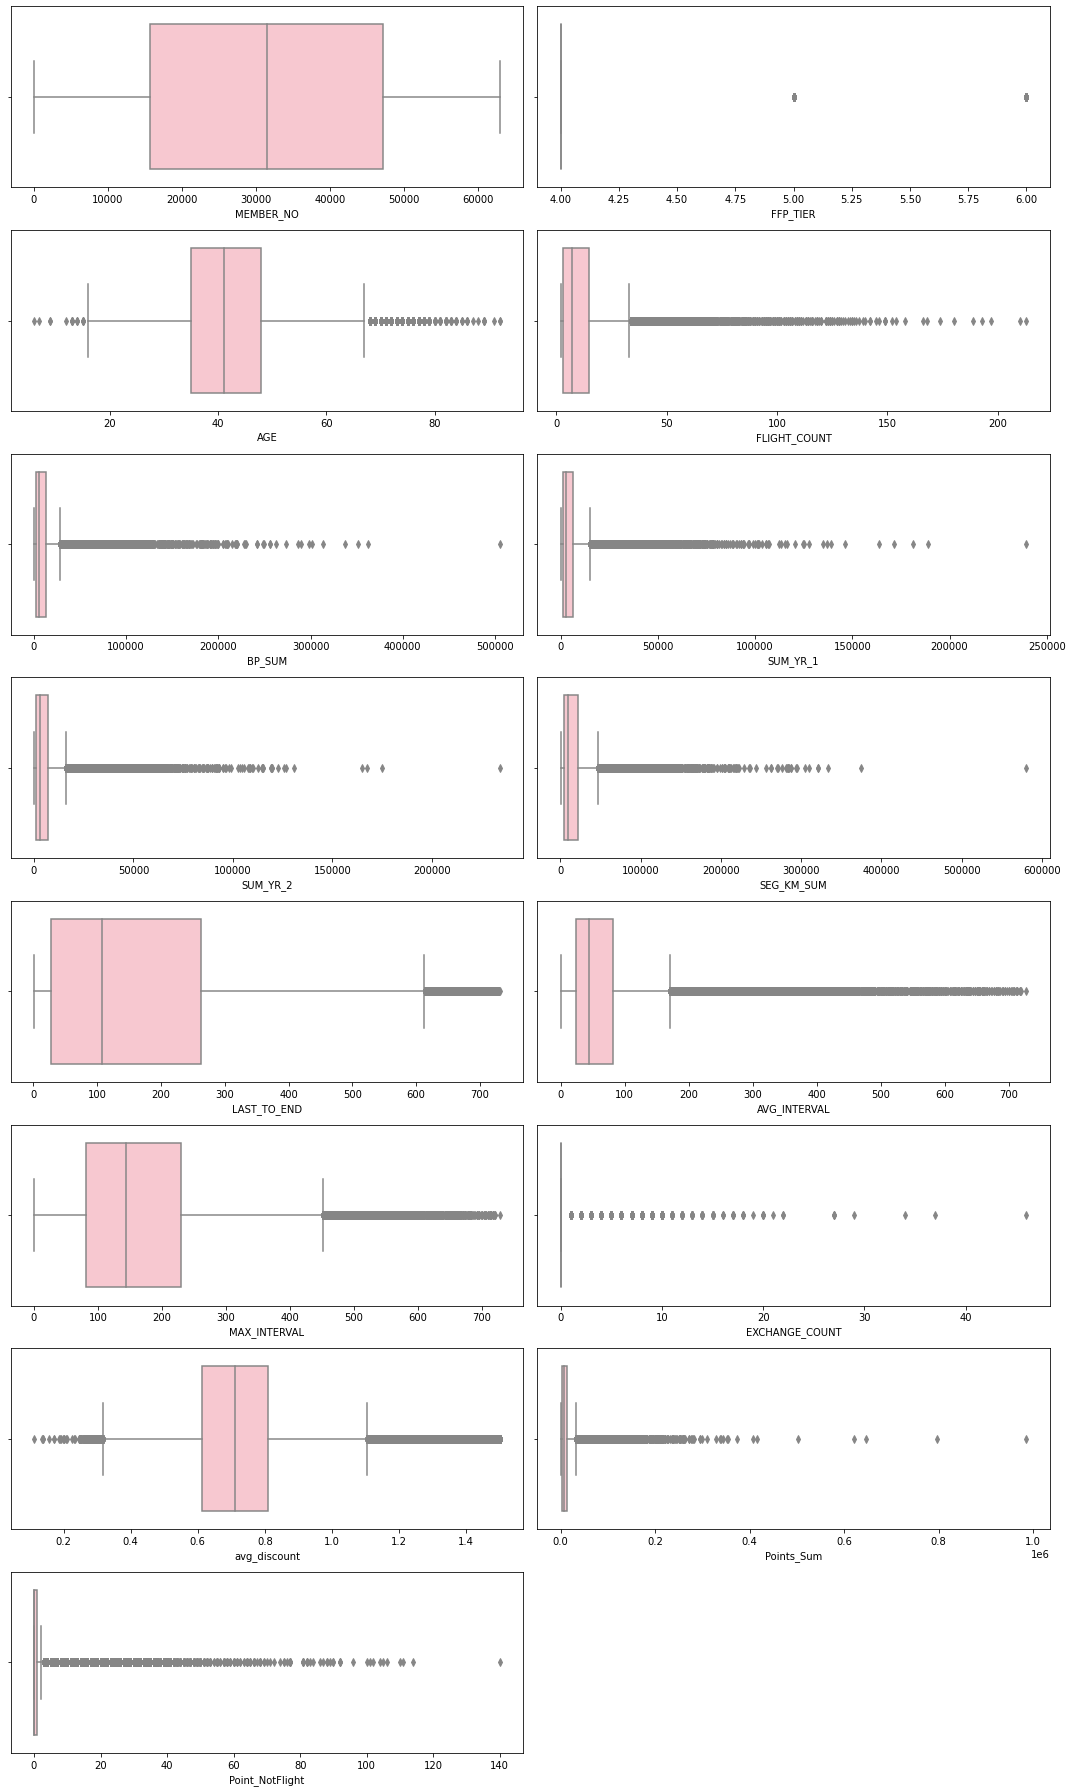

In [23]:
plt.figure(figsize=(15, 25))
for i in range(0, len(num)):
    plt.subplot(8, 2, i+1)
    sns.boxplot(x=df_clean[num[i]], color='pink')
    plt.tight_layout()

plt.show()

Box plot observations:


The majority of the columns have outliers, except for the MEMBER_NO and FFP_TIER columns


### Distribution plot for numerical data

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

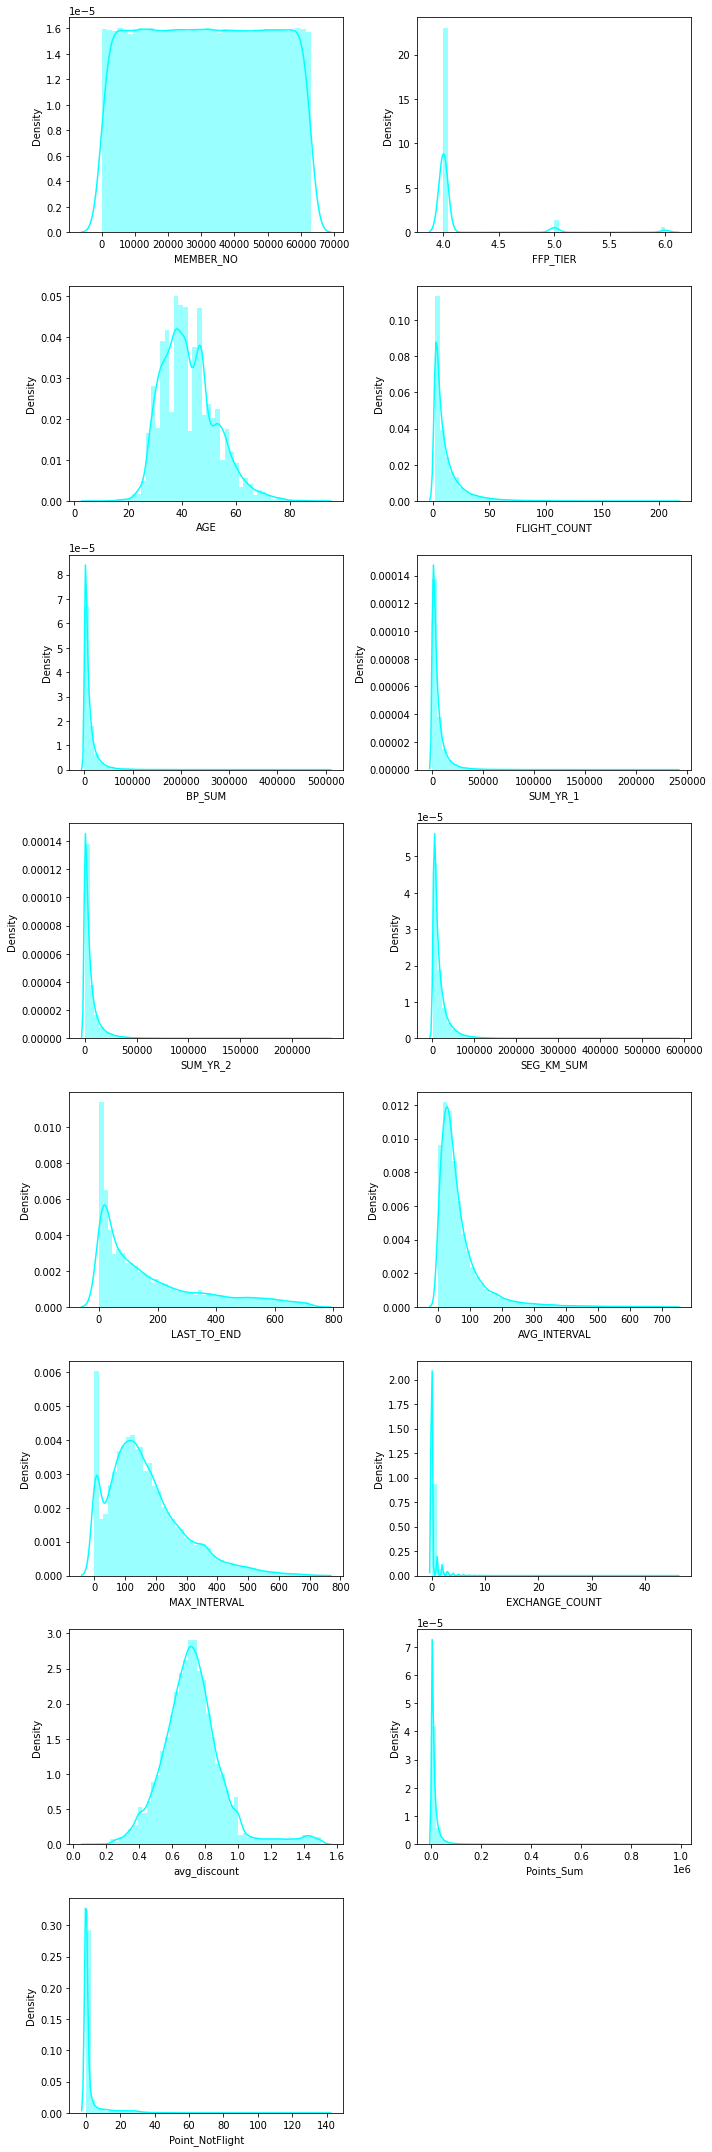

In [24]:
plt.figure(figsize=(10, 30))
for i in range(0, len(num)):
    plt.subplot(8, 2,i+1)
    sns.distplot(df_clean[num[i]], color='cyan')
    plt.tight_layout()

The majority of columns appear to have a positive skewed distribution, except for the MEMBER_NO, FFP_TIER and avg_discount columns


### Countplot for categorical data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

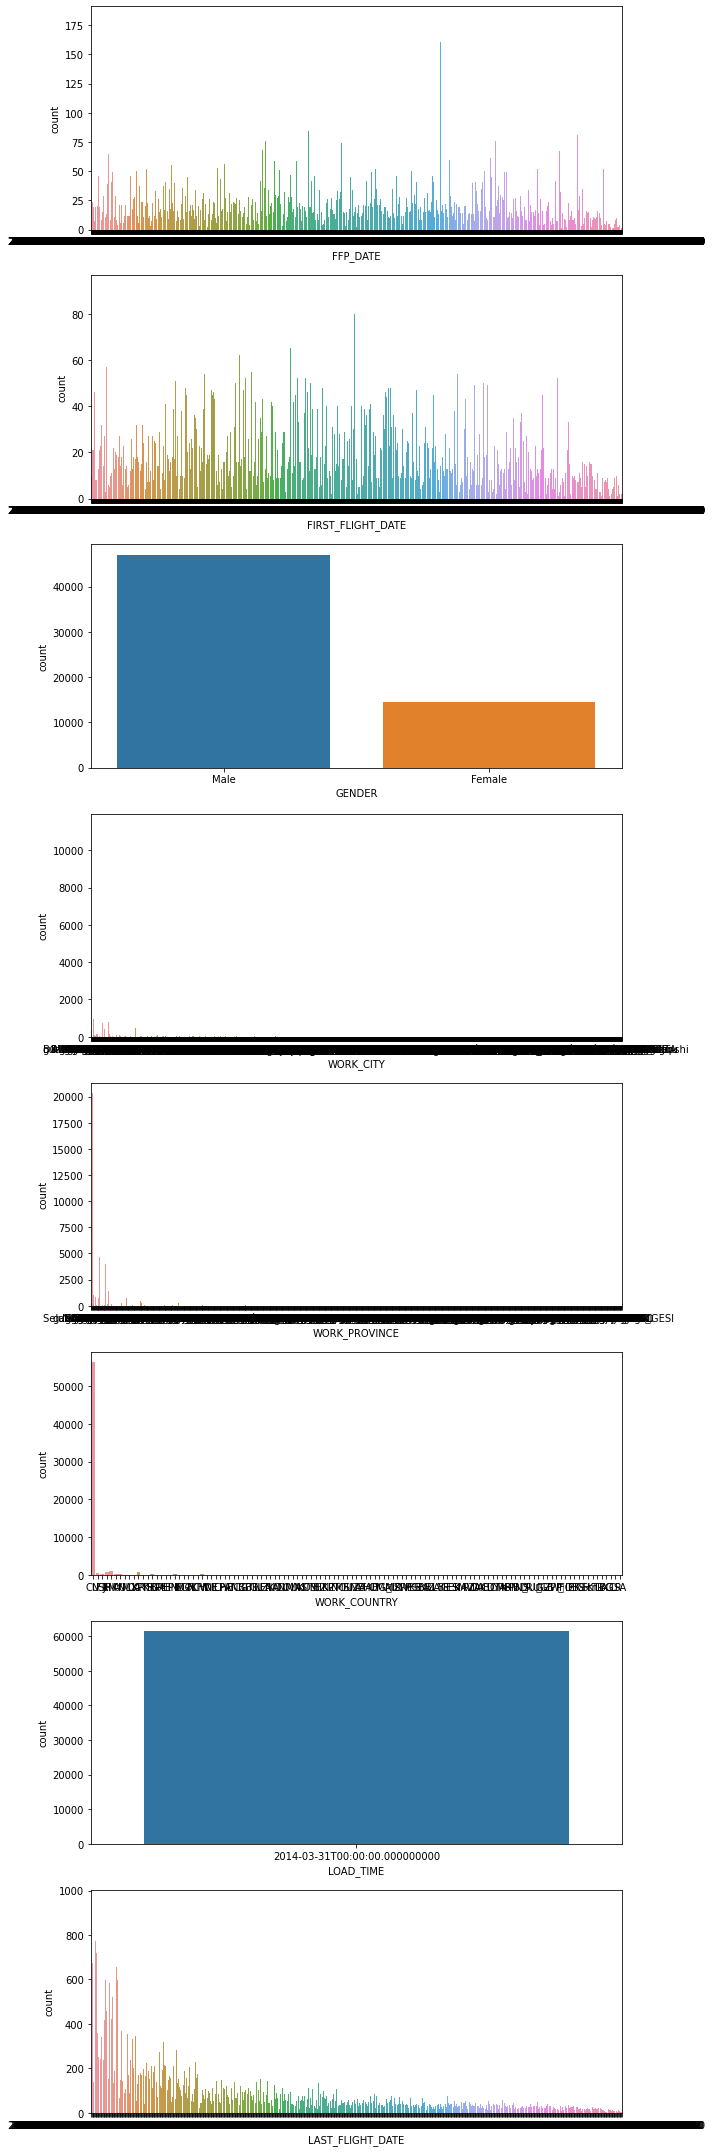

In [25]:
plt.figure(figsize=(10, 30))
for i in range(0, len(cat)):
    plt.subplot(8, 1, i+1)
    sns.countplot(df_clean[cat[i]])
    plt.tight_layout()

From Count Plot's observations:
* Most members are Male
* Majority of the columns have a large number of unique values
* For column LOAD_TIME has 1 value, that is 2014-03-31

## B. Multivariate Analysis

In [45]:
df_clean['MEMBER_DURATION'] = ((df_clean['LOAD_TIME'] - df_clean['FFP_DATE'])/np.timedelta64(1, 'M'))
df_clean['MEMBER_DURATION'] = df_clean['MEMBER_DURATION'].astype(int)
df_clean.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_DURATION,clusters
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,...,2014-03-31,1,3.483254,18,34,0.961639,619760,50,88,0
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42,2014-03-31,...,2014-03-25,7,5.194245,17,29,1.252314,415768,33,85,0
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,...,2014-03-21,11,5.298507,18,20,1.254676,406361,26,85,0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,...,2013-12-26,97,27.863636,73,11,1.090870,372204,12,67,0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,...,2014-03-27,5,4.788079,47,27,0.970658,338813,39,59,0


From the dataset, a new feature can be formed, namely `MEMBER_DURATION` which contains information about the length / duration of a person's membership by subtracting `LOAD_TIME` from joining the membership or `FFP_DATE`.

This can indicate whether the member is an existing or new customer.

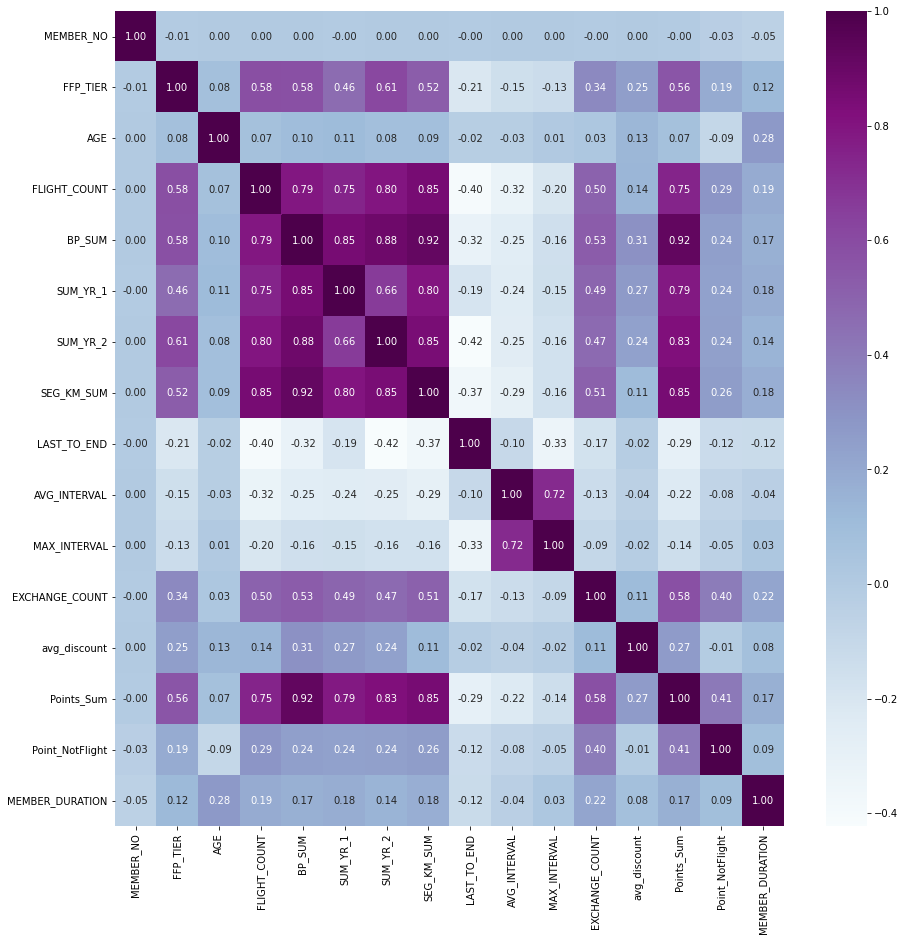

In [27]:
plt.figure(figsize=(15, 15))
sns.heatmap(df_clean.corr(), cmap='BuPu', annot=True, fmt='.2f')
plt.show()

There is a correlation between several features. Many columns have a strong positive correlation with each other, assuming > 0.5 then the following features have a fairly strong positive correlation:

- BP_SUM correlation with FLIGHT_COUNT = 0.79
- BP_SUM correlation with FFP_TIER = 0.58
- BP_SUM correlation with EXCHANGE_COUNT = 0.53
- Correlation of FLIGHT_COUNT with FFP_TIER = 0.58
- Correlation SUM_YR_1 with FLIGHT_COUNT = 0.75
- Correlation SUM_YR_1 with BP_SUM = 0.85
- Correlation SUM_YR_1 with SUM_YR_2 = 0.66
- Correlation SUM_YR_1 with SEG_KM_SUM = 0.80
- Correlation SUM_YR_1 with Points_Sum = 0.79
- Correlation of SUM_YR_2 with FFP_TIER = 0.61
- Correlation of SUM_YR_2 with FLIGHT_COUNT = 0.80
- Correlation of SUM_YR_2 with BP_SUM = 0.88
- Correlation of SUM_YR_2 with SEG_KM_SUM = 0.85
- Correlation of SUM_YR_2 with Points_Sum = 0.83
- SEG_KM_SUM correlation with FFP_TIER = 0.52
- SEG_KM_SUM correlation with FLIGHT_COUNT = 0.85
- SEG_KM_SUM correlation with BP_SUM = 0.92
- SEG_KM_SUM correlation with EXCHANGE_COUNT = 0.51
- Points_Sum correlation with FFP_TIER = 0.56
- Points_Sum correlation with FLIGHT_COUNT = 0.75
- Points_Sum correlation with BP_SUM = 0.92
- Points_Sum correlation with SEG_KM_SUM = 0.85
- Points_Sum correlation with EXCHANGE_COUNT = 0.58
- Correlation MAX_INTERVAL with AVG_INTERVAL = 0.72

# Feature Selection

By using the LRFMC model technique. Columns that will be used in the clustering process are:

* L: "MEMBER_DURATION" The number of months from the membership time to the end of the observation window
* R: "LAST_TO_END" The number of months from the end of the observation window when the customer last took a company plane Last consumption interval
* F: "FLIGHT_COUNT" The number of times customers take company aircraft in the observation window
* M: "SEG_KM_SUM" The flight mileage accumulated by the customer in the observation window
* C: "avg_discount" The average value of the discount coefficient corresponding to the customer's position in the observation window


# Reduce Dimensionality

In [28]:
df_select = df_clean.copy()
df_select = df_select[['MEMBER_DURATION','LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
display(df_select)

,MEMBER_DURATION,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,88,1,210,580717,0.961639
1,85,7,140,293678,1.252314
2,85,11,135,283712,1.254676
3,67,97,23,281336,1.090870
4,59,5,152,309928,0.970658
...,...,...,...,...,...
62974,106,89,2,368,0.710000
62975,64,121,2,368,0.670000
62976,44,39,2,1062,0.225000
62977,15,464,2,904,0.250000


In [29]:
df_select.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_DURATION,61429.0,48.215761,27.818950,11.000000,24.000000,41.000000,71.000000,112.0
LAST_TO_END,61429.0,173.550245,181.473954,1.000000,28.000000,107.000000,262.000000,731.0
FLIGHT_COUNT,61429.0,11.940956,14.119509,2.000000,3.000000,7.000000,15.000000,213.0
SEG_KM_SUM,61429.0,17277.610917,21055.460423,368.000000,4850.000000,10150.000000,21433.000000,580717.0
avg_discount,61429.0,0.721726,0.184697,0.112043,0.612569,0.711807,0.808997,1.5


In [30]:
# Normalization all column
from sklearn.preprocessing import StandardScaler, MinMaxScaler

norm_col = ['MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

for col in norm_col:
  df_select[col + '_NORM'] = MinMaxScaler().fit_transform(df_select[col].values.reshape(len(df_select), 1))

df_select['avg_discount_STD'] = MinMaxScaler().fit_transform(df_select['avg_discount'].values.reshape(len(df_select), 1))

In [31]:
df_select.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_DURATION,61429.0,48.215761,27.818950,11.000000,24.000000,41.000000,71.000000,112.0
LAST_TO_END,61429.0,173.550245,181.473954,1.000000,28.000000,107.000000,262.000000,731.0
FLIGHT_COUNT,61429.0,11.940956,14.119509,2.000000,3.000000,7.000000,15.000000,213.0
SEG_KM_SUM,61429.0,17277.610917,21055.460423,368.000000,4850.000000,10150.000000,21433.000000,580717.0
avg_discount,61429.0,0.721726,0.184697,0.112043,0.612569,0.711807,0.808997,1.5
MEMBER_DURATION_NORM,61429.0,0.368473,0.275435,0.000000,0.128713,0.297030,0.594059,1.0
LAST_TO_END_NORM,61429.0,0.236370,0.248594,0.000000,0.036986,0.145205,0.357534,1.0
FLIGHT_COUNT_NORM,61429.0,0.047114,0.066917,0.000000,0.004739,0.023697,0.061611,1.0
SEG_KM_SUM_NORM,61429.0,0.029137,0.036281,0.000000,0.007723,0.016855,0.036297,1.0
avg_discount_STD,61429.0,0.439267,0.133071,0.000000,0.360620,0.432120,0.502144,1.0


In [32]:
df_select_std = df_select.copy()
df_select_std = df_select_std[['MEMBER_DURATION_NORM', 'LAST_TO_END_NORM', 'FLIGHT_COUNT_NORM', 
                               'SEG_KM_SUM_NORM', 'avg_discount_STD']]

# Finding the ideal number of clusters using the Inertia and Silhouette Score methods

from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_select_std)
    inertia.append(kmeans.inertia_)

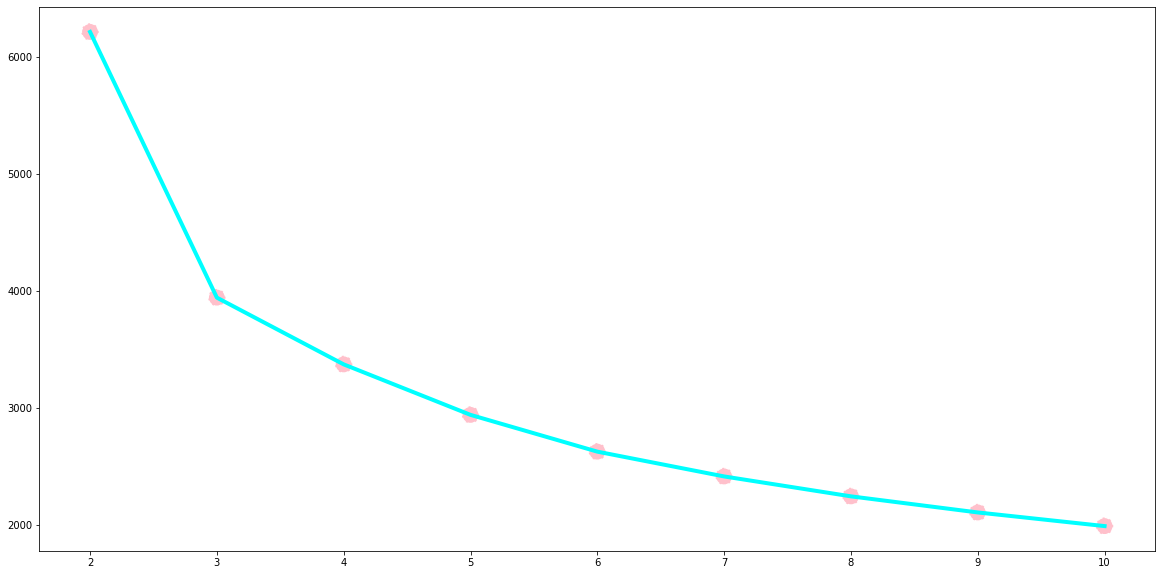

In [33]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia, color='cyan', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia, s=300, color='pink',  linestyle='--')
plt.show()

In [34]:
from sklearn.metrics import silhouette_score

range_n_clusters = list(range(2,11))
arr_silhouette_score_euclidean = []
for i in range_n_clusters:
    kmeans = KMeans(n_clusters=i).fit(df_select_std)
    preds = kmeans.predict(df_select_std)
     
    score_euclidean = silhouette_score(df_select_std, preds, metric='euclidean')
    arr_silhouette_score_euclidean.append(score_euclidean)

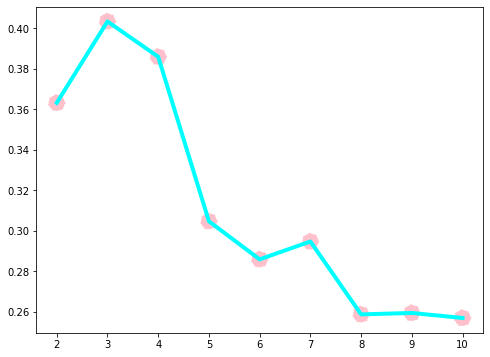

In [35]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x=range(2,11), y=arr_silhouette_score_euclidean, color='cyan', linewidth = 4)
sns.scatterplot(x=range(2,11), y=arr_silhouette_score_euclidean, s=300, color='pink',  linestyle='--')
plt.show()

Judging from the evaluation using Inertia or Silhouette Score information obtained the ideal number of clusters is 3 clusters. (The inertia value veers between 3 and 4, and the highest Silhouette score is 3 so it is concluded that the ideal cluster is 3 clusters)

In [36]:
kmeans = KMeans(init = 'k-means++', n_clusters=3, random_state=142).fit(df_select_std)
clusters = kmeans.labels_
df_clean['clusters'] = clusters
df_clean

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_DURATION,clusters
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,...,2014-03-31,1,3.483254,18,34,0.961639,619760,50,88,0
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42,2014-03-31,...,2014-03-25,7,5.194245,17,29,1.252314,415768,33,85,0
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,...,2014-03-21,11,5.298507,18,20,1.254676,406361,26,85,0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,...,2013-12-26,97,27.863636,73,11,1.090870,372204,12,67,0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,...,2014-03-27,5,4.788079,47,27,0.970658,338813,39,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005-05-08,2005-08-26,Male,4,guangzhou,guangdong,CN,34,2014-03-31,...,2014-01-03,89,70.000000,70,0,0.710000,900,1,106,0
62975,30765,2008-11-16,2013-11-30,Male,4,TAIPEI,guangdong,TW,38,2014-03-31,...,2013-12-02,121,2.000000,2,0,0.670000,400,0,64,0
62976,10380,2010-07-08,2011-06-21,Male,4,guiyangshi,guizhousheng,CN,33,2014-03-31,...,2014-02-22,39,420.000000,420,1,0.225000,213,1,44,2
62977,16372,2012-12-20,2012-12-20,Male,4,taoyuan,guangdong,TW,47,2014-03-31,...,2012-12-24,464,4.000000,4,0,0.250000,0,0,15,1


In [37]:
df_cluster = df_select_std.copy()
df_cluster['clusters'] = clusters
data_cluster=df_cluster.groupby('clusters').mean()
data_cluster
data_cluster['count'] = pd.value_counts(df_cluster['clusters'])
data_cluster

,MEMBER_DURATION_NORM,LAST_TO_END_NORM,FLIGHT_COUNT_NORM,SEG_KM_SUM_NORM,avg_discount_STD,count
clusters,,,,,,
0,0.697445,0.136733,0.066821,0.038937,0.453030,19798
1,0.270968,0.651894,0.010234,0.010685,0.435174,12453
2,0.186871,0.126634,0.049481,0.030362,0.431675,29178


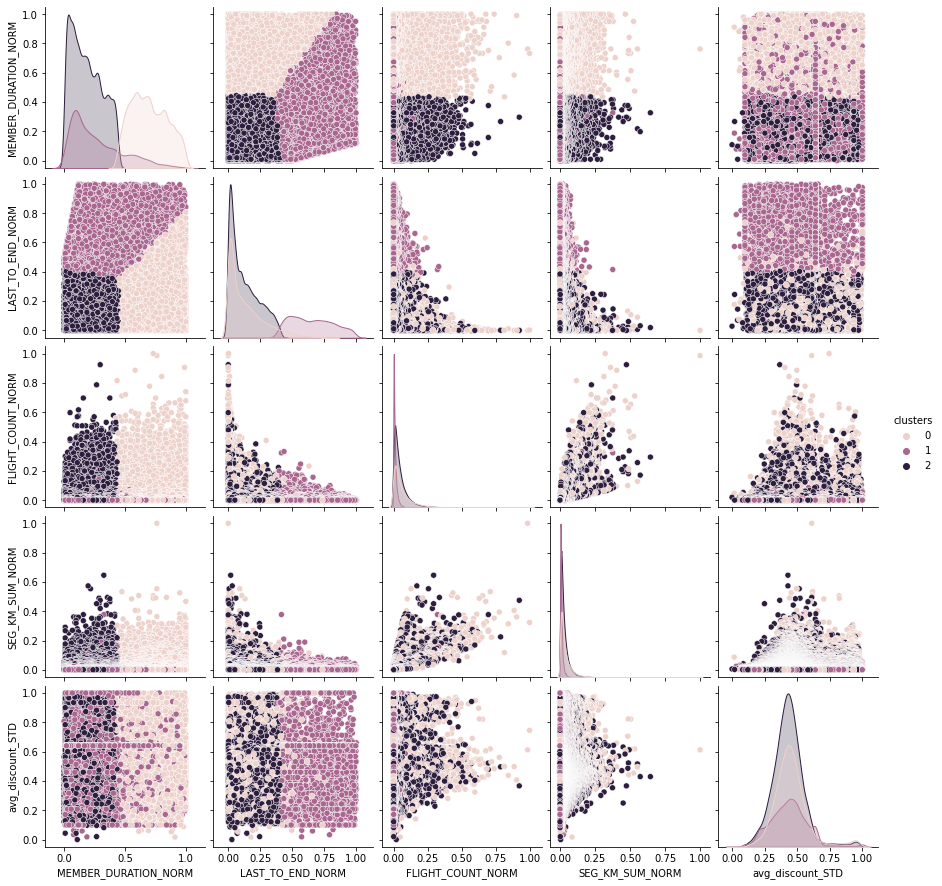

In [38]:
# sns.scatterplot(data = df_clean, x='MEMBER_DURATION', y='LAST_TO_END', hue='clusters')
# sns.scatterplot(data = df_clean, x='MEMBER_DURATION', y='FLIGHT_COUNT', hue='clusters')
# sns.scatterplot(data = df_clean, x='MEMBER_DURATION', y='SEG_KM_SUM', hue='clusters')
# sns.scatterplot(data = df_clean, x='MEMBER_DURATION', y='avg_discount', hue='clusters')
# sns.scatterplot(data = df_clean, x='LAST_TO_END', y='FLIGHT_COUNT', hue='clusters')
# sns.scatterplot(data = df_clean, x='LAST_TO_END', y='SEG_KM_SUM', hue='clusters')
# sns.scatterplot(data = df_clean, x='LAST_TO_END', y='avg_discount', hue='clusters')
# sns.scatterplot(data = df_clean, x='FLIGHT_COUNT', y='SEG_KM_SUM', hue='clusters')
# sns.scatterplot(data = df_clean, x='FLIGHT_COUNT', y='avg_discount', hue='clusters')
# sns.scatterplot(data = df_clean, x='SEG_KM_SUM', y='avg_discount', hue='clusters')
sns.pairplot(data=df_cluster, hue='clusters')

In [39]:
from sklearn.decomposition import PCA 

pca = PCA(n_components=2)

pca.fit(df_select_std)
pcs = pca.transform(df_select_std)

df_pca = pd.DataFrame(data = pcs, columns = ['PC 1', 'PC 2'])
df_pca

,PC 1,PC 2
0,0.579350,-0.153512
1,0.512139,-0.108383
2,0.507222,-0.100789
3,0.247390,-0.031209
4,0.278687,-0.232680
...,...,...
61424,0.557215,0.152839
61425,0.164295,0.008917
61426,0.020003,-0.183042
61427,-0.487843,0.211243


In [40]:
df_pca['clusters'] = clusters
df_pca

,PC 1,PC 2,clusters
0,0.579350,-0.153512,0
1,0.512139,-0.108383,0
2,0.507222,-0.100789,0
3,0.247390,-0.031209,0
4,0.278687,-0.232680,0
...,...,...,...
61424,0.557215,0.152839,0
61425,0.164295,0.008917,0
61426,0.020003,-0.183042,2
61427,-0.487843,0.211243,1


# Find the Clusters

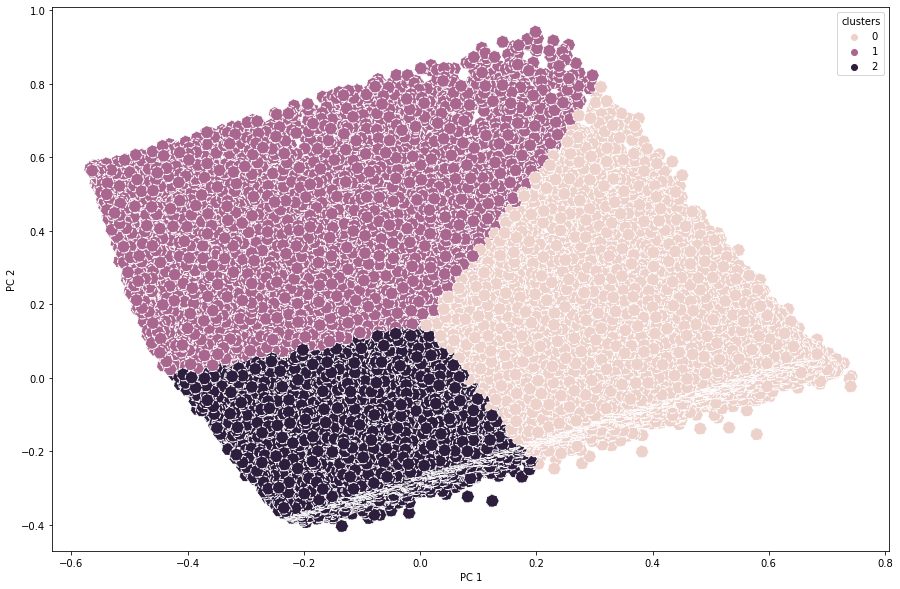

In [41]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='PC 1', y='PC 2',
    hue='clusters',
    linestyle='--',
    data=df_pca,
    s=160,
    ax=ax)

plt.show()

# Interpretation and Recommendation

In [42]:
df_clean

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,MEMBER_DURATION,clusters
0,54993,2006-11-02,2008-12-24,Male,6,.,beijing,CN,31,2014-03-31,...,2014-03-31,1,3.483254,18,34,0.961639,619760,50,88,0
1,28065,2007-02-19,2007-08-03,Male,6,guangzhou,beijing,CN,42,2014-03-31,...,2014-03-25,7,5.194245,17,29,1.252314,415768,33,85,0
2,55106,2007-02-01,2007-08-30,Male,6,.,beijing,CN,40,2014-03-31,...,2014-03-21,11,5.298507,18,20,1.254676,406361,26,85,0
3,21189,2008-08-22,2008-08-23,Male,5,Los Angeles,CA,US,64,2014-03-31,...,2013-12-26,97,27.863636,73,11,1.090870,372204,12,67,0
4,39546,2009-04-10,2009-04-15,Male,6,guiyang,guizhou,CN,48,2014-03-31,...,2014-03-27,5,4.788079,47,27,0.970658,338813,39,59,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62974,11163,2005-05-08,2005-08-26,Male,4,guangzhou,guangdong,CN,34,2014-03-31,...,2014-01-03,89,70.000000,70,0,0.710000,900,1,106,0
62975,30765,2008-11-16,2013-11-30,Male,4,TAIPEI,guangdong,TW,38,2014-03-31,...,2013-12-02,121,2.000000,2,0,0.670000,400,0,64,0
62976,10380,2010-07-08,2011-06-21,Male,4,guiyangshi,guizhousheng,CN,33,2014-03-31,...,2014-02-22,39,420.000000,420,1,0.225000,213,1,44,2
62977,16372,2012-12-20,2012-12-20,Male,4,taoyuan,guangdong,TW,47,2014-03-31,...,2012-12-24,464,4.000000,4,0,0.250000,0,0,15,1


In [43]:
df_clean[['MEMBER_NO','MEMBER_DURATION', 'LAST_TO_END', 'FLIGHT_COUNT', 
          'SEG_KM_SUM', 'avg_discount', 'clusters']].groupby('clusters').agg({'MEMBER_DURATION': ['mean', 'median'], 
                                                                              'LAST_TO_END': ['mean', 'median'],
                                                                              'FLIGHT_COUNT': ['mean', 'median'],
                                                                              'SEG_KM_SUM': ['mean', 'median'],
                                                                              'avg_discount': ['mean', 'median'],
                                                                              'MEMBER_NO': ['count']})

MEMBER_DURATION        LAST_TO_END        FLIGHT_COUNT         \
                    mean median        mean median         mean median   
clusters                                                                 
0              81.441964   80.0  100.814931   67.0    16.099252   10.0   
1              38.367783   32.0  476.882679  468.0     4.159399    3.0   
2              29.874015   28.0   93.442457   71.0    12.440572    8.0   

            SEG_KM_SUM          avg_discount           MEMBER_NO  
                  mean   median         mean    median     count  
clusters                                                          
0         22965.292908  14494.5     0.740829  0.721280     19798  
1          6568.889264   4583.0     0.716045  0.714320     12453  
2         17988.796833  11732.0     0.711189  0.704701     29178

* L: "MEMBER_DURATION" The number of months from the membership time to the end of the observation window
* R: "LAST_TO_END" The number of months from the end of the observation window when the customer last took a company plane Last consumption interval
* F: "FLIGHT_COUNT" The number of times customers take company aircraft in the observation window
* M: "SEG_KM_SUM" The flight mileage accumulated by the customer in the observation window
* C: "avg_discount" The average value of the discount coefficient corresponding to the customer's position in the observation window


**Cluster 1 (low value customer):**
- Low-level flight recency (median)
- Low-level flight frequency
- Lowest level airline mileage
- The middle level of average discount, shows the middle level of flight class
- Membership duration between cluster 0 and cluster 2
- Lowest number of cluster members

Recommendation: Airline needs to increase interaction with these customers and needs to take certain marketing strategies to extend this customer cycle


**Cluster 0 (high value customer):**
- Highest level flight recency
- Highest rate flight frequency
- Highest level of airline mileage
- In the high discount level, it shows the highest level flight class
- Most loyal cluster membership duration
- Middle number of cluster members

Recommendation: They are the most ideal type of customer, they contribute the most to the airline. They are also loyal. Airline needs to provide special management for these customers and improve their satisfaction.

**Cluster 2 (middle value customers):**
- Lowest level flight recency (most recent)
- Mid level of flight frequency
- Mid level of airline mileage
- The lowest level of average discount, shows the low level of flight class
- Shortest membership duration
- highest number of cluster members

Recommendation: As a potential customer, airline can encourage these customers to increase transactions.
